UCSanDiegoX: DSE200x Python for Data Science

Week 4 - Pandas / part 2

based ml-20m.zip from https://grouplens.org/datasets/movielens/

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

Pandas: Data Cleaning

- df.replace() to globally replace values
- df.fillna() w/ ffill or backfill option
- df.dropna() drop entire inconsistent rows or columns (axis)
- df.interpolate() linear by default

In [2]:
tags = pd.read_csv('./movielens/tags.csv')
tags.shape

(465564, 4)

In [3]:
# there are nulls in tags, column 'tag'
print(tags.isnull().any())

# drop rows w/null
tags = tags.dropna()

# no more nulls
print(tags.isnull().any())

# a few rows are gone
print(tags.shape)

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool
userId       False
movieId      False
tag          False
timestamp    False
dtype: bool
(465548, 4)


Pandas: Data Visualization

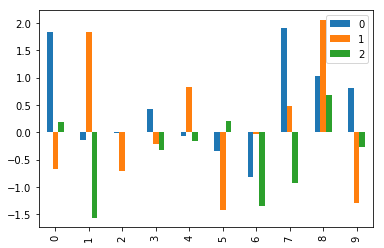

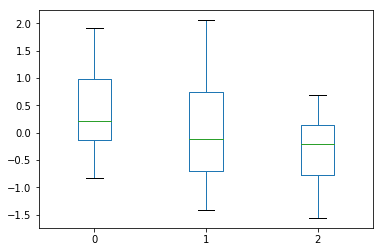

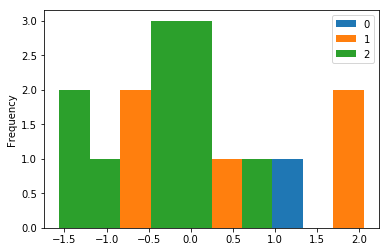

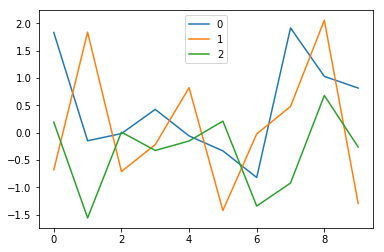

In [4]:
df = pd.DataFrame(np.random.randn(10, 3))

# show all values
df.plot.bar()

# show min, max, median for each column
df.plot.box()

# show dispersion for columns
df.plot.hist()

# line graph
df.plot()

In [5]:
ratings = pd.read_csv('./movielens/ratings.csv', parse_dates=['timestamp'])
ratings.shape

(20000263, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CDE6DA9BA8>]],
      dtype=object)

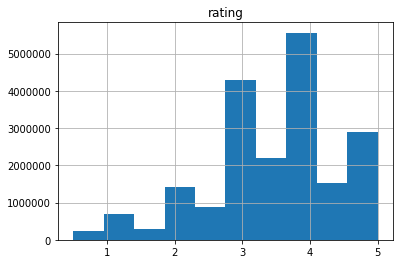

In [6]:
ratings.hist(column='rating')

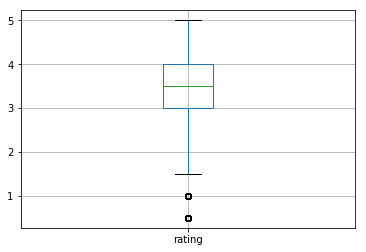

In [7]:
ratings.boxplot(column='rating')

Pandas: Frequent Data Operations

In [8]:
df = pd.DataFrame(np.random.randn(10, 3), columns=['sensor1', 'sensor2', 'sensor3'])
print(df)
print('---')

# filtering to get only rows with positive values on sensor2
print(df[df['sensor2'] > 0])
print('---')

# adding a new column
df['sensor4'] = df['sensor3'] ** 2
print(df)
print('---')

# adding a new row using loc
df.loc[10] = range(4)
# dropping a row
df.drop(5, inplace=True)  # by label
df.drop(df.index[[2, 7]], inplace=True)  # by position
print(df)
print('---')

# delete a column
del df['sensor1']
print(df)

    sensor1   sensor2   sensor3
0 -1.404398 -0.382115  1.711660
1 -0.483539  0.280166 -0.350344
2 -0.426291  1.315404  0.798538
3  1.106312 -0.775663 -0.402716
4 -0.761660  0.136160 -0.072716
5  0.577316  2.329518  0.427510
6 -0.646017  0.118722  0.163742
7 -0.251940  1.224161  0.600089
8  1.690781  1.193172  0.140015
9 -1.146702 -0.508880  0.667212
---
    sensor1   sensor2   sensor3
1 -0.483539  0.280166 -0.350344
2 -0.426291  1.315404  0.798538
4 -0.761660  0.136160 -0.072716
5  0.577316  2.329518  0.427510
6 -0.646017  0.118722  0.163742
7 -0.251940  1.224161  0.600089
8  1.690781  1.193172  0.140015
---
    sensor1   sensor2   sensor3   sensor4
0 -1.404398 -0.382115  1.711660  2.929779
1 -0.483539  0.280166 -0.350344  0.122741
2 -0.426291  1.315404  0.798538  0.637663
3  1.106312 -0.775663 -0.402716  0.162180
4 -0.761660  0.136160 -0.072716  0.005288
5  0.577316  2.329518  0.427510  0.182765
6 -0.646017  0.118722  0.163742  0.026811
7 -0.251940  1.224161  0.600089  0.360106
8  1.6

In [9]:
df = pd.DataFrame(np.random.randn(10, 3), columns=['sensor1', 'sensor2', 'sensor3'])
df['owner'] = [1, 1, 1, 2, 2, 3, 3, 3, 3, 4]
print(df)

#group by and aggregate
print(df.groupby('owner').mean())

    sensor1   sensor2   sensor3  owner
0  0.306863 -0.068859  0.072018      1
1  0.714847  0.307443 -0.556427      1
2  0.685788  0.632739 -0.263365      1
3  2.542263  0.661120 -1.771633      2
4 -0.074488  0.308969 -0.471529      2
5  1.109748  1.132914 -1.354446      3
6 -0.700229 -0.436623  0.889261      3
7 -0.657010 -1.373701 -0.066532      3
8 -0.884196  1.545508  0.150695      3
9 -0.664534 -0.420888  0.656511      4
        sensor1   sensor2   sensor3
owner                              
1      0.569166  0.290441 -0.249258
2      1.233888  0.485044 -1.121581
3     -0.282922  0.217025 -0.095256
4     -0.664534 -0.420888  0.656511


Live Code: Frequent Data Operations

In [10]:
# get an idea of the tag column in tags dataframe
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [13]:
# we are going to use also the movies data
movies = pd.read_csv('./movielens/movies.csv')

movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [15]:
# picking ten lines in the ratings table
print(ratings[1000:1010])

# last ten
ratings[-10:]

      userId  movieId  rating   timestamp
1000      11      527     4.5  1251170861
1001      11      531     4.5  1230782539
1002      11      541     4.5  1230787503
1003      11      546     5.0  1230788928
1004      11      551     5.0  1230853957
1005      11      586     4.0  1230859027
1006      11      587     4.5  1230858969
1007      11      588     5.0  1251170867
1008      11      589     4.5  1230788848
1009      11      592     4.5  1230789445


,userId,movieId,rating,timestamp
20000253,138493,60816,4.5,1259865163
20000254,138493,61160,4.0,1258390537
20000255,138493,65682,4.5,1255816373
20000256,138493,66762,4.5,1255805408
20000257,138493,68319,4.5,1260209720
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


In [25]:
# count unique values in a column
tag_counts = tags['tag'].value_counts()
print(tag_counts[-10:])
print(tag_counts[:10])

Extended edition                                       1
Cloverfield without the melodrama                      1
sex drugs and rnr..what more could you want            1
Best Performance:  Humphrey Bogart as Fred C. Dobbs    1
Babak Payami                                           1
to see: battle royale style                            1
greek 60's                                             1
no monster                                             1
Christy Cabanne                                        1
warwick davis                                          1
Name: tag, dtype: int64
sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64


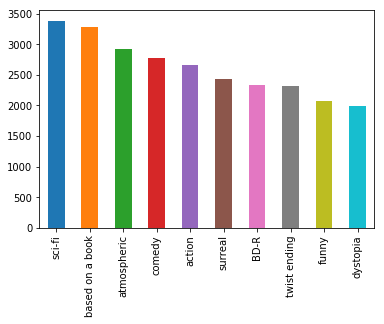

In [31]:
tag_counts[:10].plot(kind='bar')

Filters for Selecting Rows

In [35]:
# True for highly rated movies
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][10:20]

,userId,movieId,rating,timestamp
26,1,1090,4.0,1112485453
27,1,1097,4.0,1112485701
30,1,1196,4.5,1112484742
31,1,1198,4.5,1112484624
32,1,1200,4.0,1112484560
35,1,1214,4.0,1094785977
36,1,1215,4.0,1094786082
38,1,1219,4.0,1094785994
40,1,1240,4.0,1112485401
43,1,1249,4.0,1112485382


In [39]:
# True if the genres contains the specified tag
is_animation = movies['genres'].str.contains('Animation')

print(movies[is_animation][-5:])
print(movies[is_animation].head())

       movieId                                title  \
27241   131132  Kleines Arschloch - Der Film (1997)   
27247   131144  Werner - Das muss kesseln!!! (1996)   
27248   131146        Werner - Volles Rooäää (1999)   
27269   131243  Werner - Gekotzt wird später (2003)   
27270   131248                Brother Bear 2 (2006)   

                                            genres  
27241                             Animation|Comedy  
27247                             Animation|Comedy  
27248                             Animation|Comedy  
27269                             Animation|Comedy  
27270  Adventure|Animation|Children|Comedy|Fantasy  
     movieId                    title  \
0          1         Toy Story (1995)   
12        13             Balto (1995)   
47        48        Pocahontas (1995)   
236      239    Goofy Movie, A (1995)   
241      244  Gumby: The Movie (1995)   

                                          genres  
0    Adventure|Animation|Children|Comedy|Fantasy  
12

Group By and Aggregate

In [40]:
# group the movies by rating, count each group
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [41]:
# group the movies by id, get the mean rating for each one
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [43]:
# group the movies by id, count each of them
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
print(movie_count.head())
movie_count.tail()

         rating
movieId        
1         49695
2         22243
3         12735
4          2756
5         12161


,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1
